In [1]:
%matplotlib inline
import pylab as plt
import numpy as np
import blimpy as bl
from scipy import signal
import rfi

In [2]:
path="data/"
gps1="20200917_guppi_59046_53079_001660_J0825-5010_0001-ics.rawspec.0000.combined.fil"
gps2="20200917_guppi_59074_56719_004562_J0835-4510_0001-ics.rawspec.0000.combined.fil"
gps6="20200917_guppi_59086_58889_001614_Unknown_0001-ics.rawspec.0000.combined.fil"
gps4="20200917_guppi_59087_55680_001685_J1101-6424_0001-ics.rawspec.0000.combined.fil"
gps5="20200917_guppi_59087_75602_005655_J2129-5721_0001-ics.rawspec.0000.combined.fil"
gps3="20200917_guppi_59109_53457_003376_J1644-4559_0001-ics.rawspec.0000.combined.fil"
gps7="20200917_guppi_59143_54504_000454_J1939-6342_0001-ics.rawspec.0000.combined.fil"
gps8="20200917_guppi_59143_55142_000486_GPS-BIIR-11_0001-ics.rawspec.combined.fil"
gps=[gps1,gps2,gps3,gps4,gps5,gps6]
gps_1=[gps7,gps8,gps2]

In [3]:
wgps=[]
wgps_1=[]
for i in gps:
    wgps.append(bl.Waterfall(path+i))
for i in gps_1:
    wgps_1.append(bl.Waterfall(path+i))
#bl.plotting.get_power(wgps[1])
wgps[1].get_power()

extracting integration 0...


(array([ 856.        ,  856.20898438,  856.41796875, ..., 1711.37304688,
        1711.58203125, 1711.79101562]),
 array([284606.47 ,  17842.76 ,  17867.139, ...,   8599.133,   8614.611,
          8712.286], dtype=float32))

In [4]:
rfi.localmax(wgps[0])

extracting integration 0...


[(938.7578125, 946.490234375),
 (1122.6640625, 1122.6640625),
 (1153.384765625, 1173.865234375),
 (1214.19921875, 1214.19921875),
 (1313.048828125, 1313.048828125),
 (1416.49609375, 1468.115234375)]

extracting integration 0...
extracting integration 0...
[284606.47   17842.76   17867.139 ...   8599.133   8614.611   8712.286]
[ 382  391  402  413  417  433  444  453  475 1532 1679 1777 1973 2699
 3215 3309 3372 3439]
[ 935.83203125  937.71289062  940.01171875  942.31054688  943.14648438
  946.49023438  948.7890625   950.66992188  955.26757812 1176.1640625
 1206.88476562 1227.36523438 1268.32617188 1420.04882812 1527.88476562
 1547.52929688 1560.6953125  1574.69726562]
[   0  387  401    0    0  431  442  450  472 1485 1625 1726 1927 2695
 3213 3307 3344 3392]
[ 409  409  409  415 4090 4090  450 4090 4090 2695 1726 2695 2695 4090
 3392 3392 3392 4090]


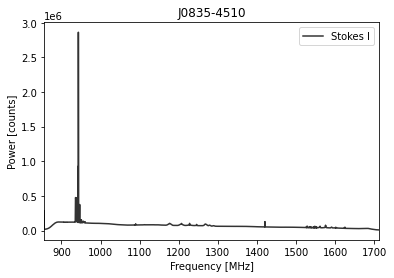

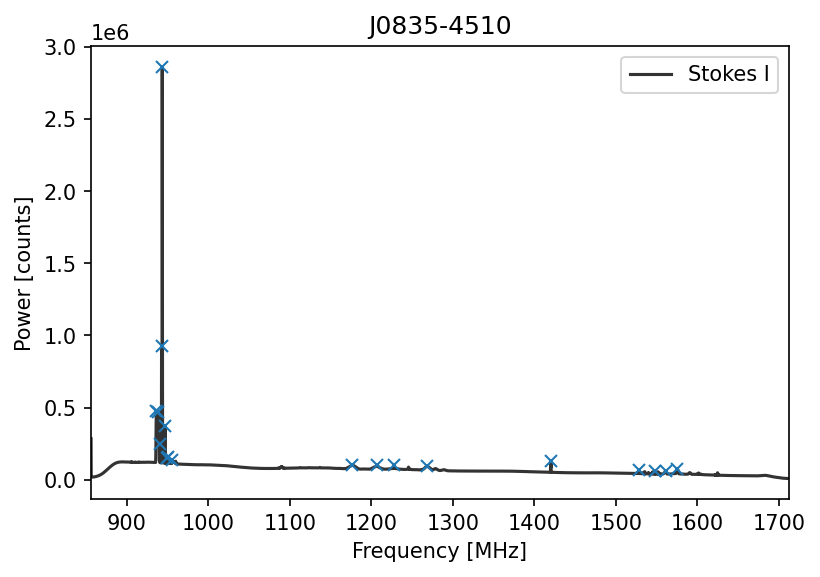

In [91]:
# plt.figure(dpi=100)
# #plot_f,plot_data=wgps[1].plot_spectrum()
# x=electrocardiogram()[2000:4000]
# peak=signal.find_peaks(x,height=1.0)
# peak_1=signal.find_peaks(x,prominence=(0.5,1.5))
# #print(peak)
# #print(x)
# #plt.plot(peak[0],x[peak[0]],"x")
# plt.plot(peak_1[0],x[peak_1[0]],"x")
# plt.plot(x)
plot_f,plot_data=wgps[1].plot_spectrum()
peak=signal.find_peaks(plot_data[1:],prominence=(20000,3.0e6))
#print(peak[0])
plt.figure(dpi=150)
wgps[1].plot_spectrum()
plt.plot(plot_f[1:][peak[0]],plot_data[1:][peak[0]],"x")
print(plot_data)
print(peak[0])
print(plot_f[peak[0]])
print(peak[1]['left_bases'])
print(peak[1]['right_bases'])
# plt.axvline(938.966796875)
# plt.axvline(946.69921875)

In [84]:
i=0
rfi=[]
start=plot_f[peak[0][i]]
if(plot_f[peak[0][i+1]]-start<=30):
    end=plot_f[peak[0][i+1]]
    length=len(peak[0][i+1:])
    for j in range(length):
        if j==length-1:
            end=plot_f[peak[0][i+1:][j]]
            i+=j+1
            rfi.append((start,end))
            break
        else:
            if (abs(plot_f[peak[0][i+1:][j]]-end)<=30):
                end=plot_f[peak[0][i+1:][j]]
            else:
                i+=j+1
                print(j)
                if(j==0):
                    rfi.append((start,start))
                else:
                    rfi.append((start,end))
                break
else:
    rfi.append((start,start))
    i+=1
rfi

[(572.8203125, 572.8203125)]

In [94]:
i=0
rfi=[]
while i<len(peak[0])-1:
    start=plot_f[peak[0][i]]
    if(plot_f[peak[0][i+1]]-start<=30):
        end=plot_f[peak[0][i+1]]
        length=len(peak[0][i+1:])
        for j in range(length):
            if j==length-1:
                end=plot_f[peak[0][i+1:][j]]
                i+=j+1
                rfi.append((start,end))
                break
            else:
                if (abs(plot_f[peak[0][i+1:][j]]-end)<=30):
                    end=plot_f[peak[0][i+1:][j]]
                else:
                    i+=j+1
                    if(j==0):
                        rfi.append((start,start))
                    else:
                        rfi.append((start,end))
                    break
    else:
        rfi.append((start,start))
        i+=1
rfi

[(935.83203125, 955.267578125),
 (1176.1640625, 1176.1640625),
 (1206.884765625, 1227.365234375),
 (1268.326171875, 1268.326171875),
 (1420.048828125, 1420.048828125),
 (1527.884765625, 1574.697265625)]

extracting integration 0...


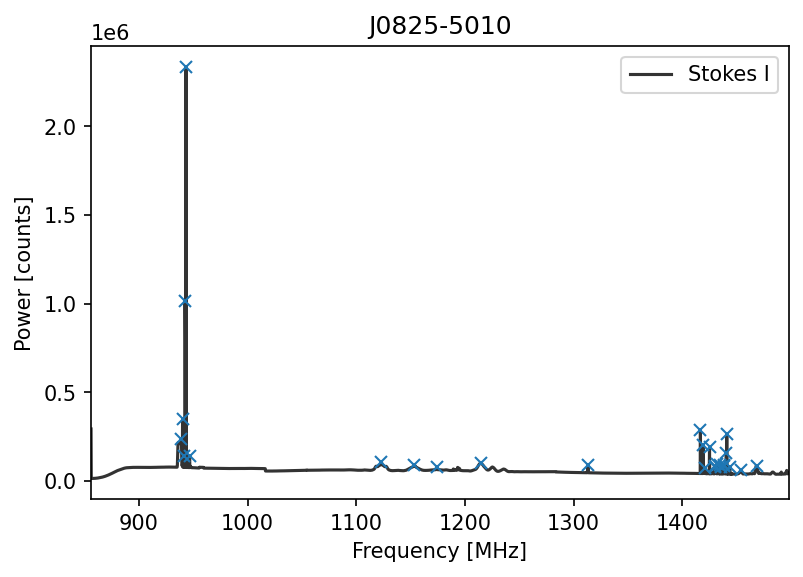

In [36]:
plt.figure(dpi=150)
wgps[0].plot_spectrum()
plt.plot(plot_f[peak[0]],plot_data[peak[0]],"x")

extracting integration 0...


(array([1100.09375   , 1100.30273438, 1100.51171875, 1100.72070312,
        1100.9296875 , 1101.13867188, 1101.34765625, 1101.55664062,
        1101.765625  , 1101.97460938, 1102.18359375, 1102.39257812,
        1102.6015625 , 1102.81054688, 1103.01953125, 1103.22851562,
        1103.4375    , 1103.64648438, 1103.85546875, 1104.06445312,
        1104.2734375 , 1104.48242188, 1104.69140625, 1104.90039062,
        1105.109375  , 1105.31835938, 1105.52734375, 1105.73632812,
        1105.9453125 , 1106.15429688, 1106.36328125, 1106.57226562,
        1106.78125   , 1106.99023438, 1107.19921875, 1107.40820312,
        1107.6171875 , 1107.82617188, 1108.03515625, 1108.24414062,
        1108.453125  , 1108.66210938, 1108.87109375, 1109.08007812,
        1109.2890625 , 1109.49804688, 1109.70703125, 1109.91601562,
        1110.125     , 1110.33398438, 1110.54296875, 1110.75195312,
        1110.9609375 , 1111.16992188, 1111.37890625, 1111.58789062,
        1111.796875  , 1112.00585938, 1112.21484

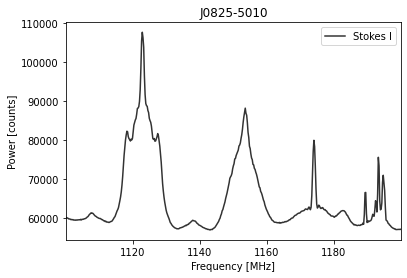

In [30]:
wgps[0].plot_spectrum(f_start=1100,f_stop=1200)

In [5]:
for i in wgps:
    print(i.header['src_raj'])
    print(i.header['src_dej'])

8h26m01.91s
-47d14m54.5s
8h26m01.91s
-47d14m54.5s
16h46m18.14s
-46d01m29s
8h26m01.91s
-47d14m54.5s
8h26m01.91s
-47d14m54.5s
8h26m01.91s
-47d14m54.5s


extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


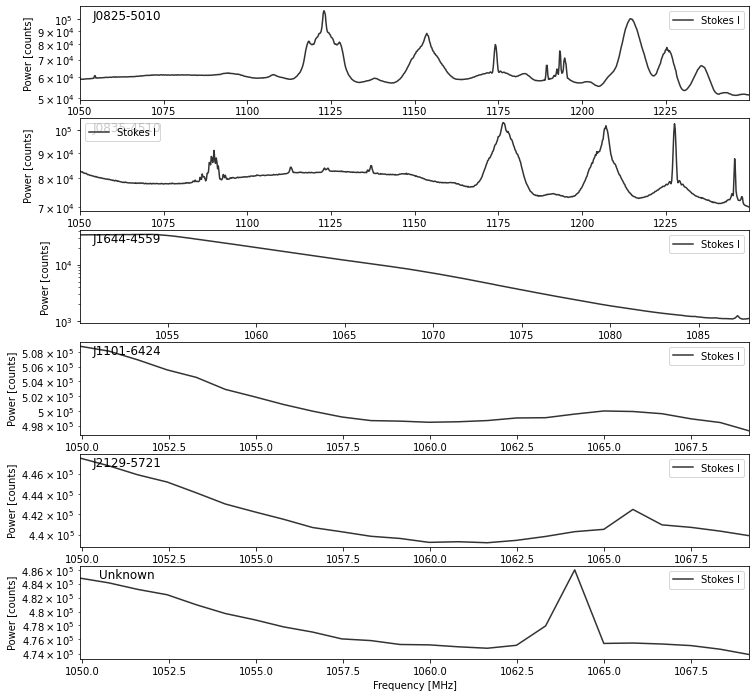

In [12]:
plt.figure(figsize=(12,12))
for i in range(len(wgps)):
    plt.subplot(6,1,i+1)
    wgps[i].plot_spectrum(f_start=1050,f_stop=1250)
    if(i!=len(wgps)-1):
        #plt.xticks([])
        plt.xlabel('')
    plt.axvline(x=935,linestyle='--')
    plt.axvline(x=940,linestyle='--')
    plt.axvline(x=940,linestyle='--')
    plt.yscale('log')
    plt.title(wgps[i].header.get('source_name'),x=0.07,y=0.8)
#plt.subplots_adjust(hspace=0)
plt.savefig('RFI_rescaled.pdf')
plt.show()

extracting integration 0...
extracting integration 0...


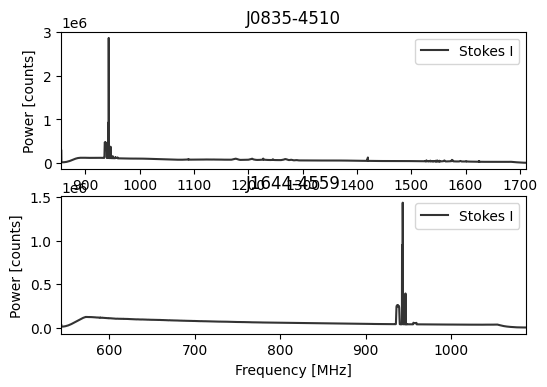

In [16]:
plt.figure(dpi=100)
plt.subplot(2,1,1)
wgps[1].plot_spectrum()
plt.subplot(2,1,2)
wgps[2].plot_spectrum()

extracting integration 0...


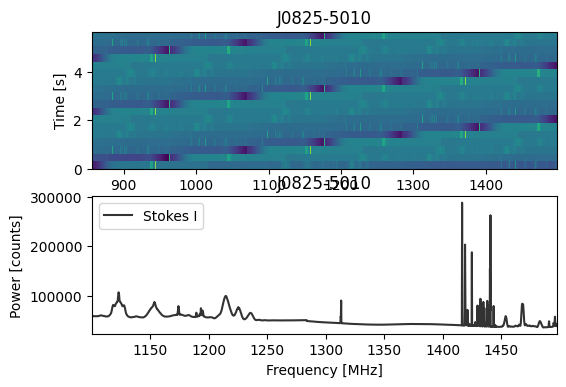

In [17]:
plt.figure(dpi=100)
plt.subplot(2,1,1)
wgps[0].plot_waterfall(cb=False)
plt.subplot(2,1,2)
wgps[0].plot_spectrum(f_start=1100)

extracting integration 0...
extracting integration 0...
extracting integration 0...


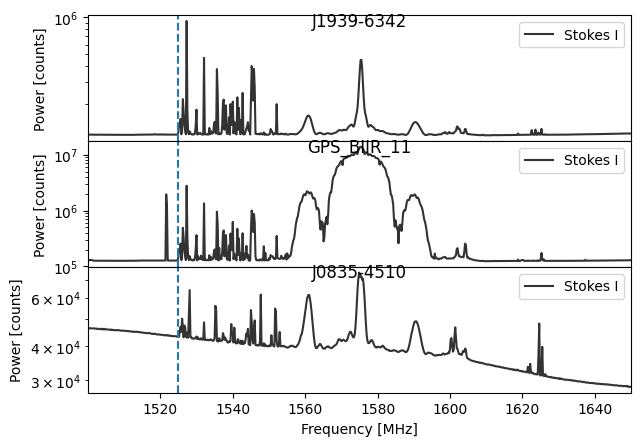

In [35]:
plt.figure(dpi=100,figsize=(7,5))
for i in range(len(wgps_1)):
    plt.subplot(3,1,i+1)
    wgps_1[i].plot_spectrum(f_start=1500,f_stop=1650)
    if(i!=len(wgps_1)-1):
        plt.xticks([])
        plt.xlabel('')
    #plt.ylim()
    plt.axvline(x=1525,linestyle='--')
    plt.title(wgps_1[i].header.get('source_name'),x=0.5,y=0.85)
    plt.yscale('log')
plt.subplots_adjust(hspace=0)
#plt.savefig('result/RFI_1.pdf')
plt.show()

extracting integration 0...


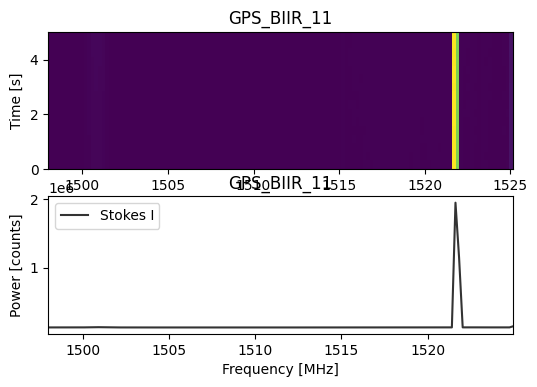

In [31]:
plt.figure(dpi=100)
plt.subplot(2,1,1)
wgps_1[1].plot_waterfall(f_stop=1525,cb=False)
plt.subplot(2,1,2)
wgps_1[1].plot_spectrum(f_stop=1525)